# Coco Image Presenter

This notebook is intended to visually inspect the images from the Coco dataset. The key part of this notebook is to present randomly selected image along with its bounding boxes

In [4]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches #for bounding box
from PIL import Image
import random
import commonPaths
import commonCocoPreprocessingFunctions as preprocFuncs
from importlib import reload
reload(commonPaths)
reload(preprocFuncs);

In [2]:
def showRandomImageWithAnnotations(directoryPath, imageIdToPropsAndAnnots, categoryIdToName, showBB=True):
    '''
        ### showRandomImageWithAnnotations
        selects and displays random image from given directory with the bounding boxes

        :param directoryPath: path to the directory with images (with trailing slash)
        :param imageIdToPropsAndAnnots: directory where key=imageId, value=CocoImage object (e.g. result of associateImageIdWithItsPropsAndAnnots)
        :param categoryIdToName: directory where key=categoryId, value=categoryName (e.g. result of associateCategoryIdWithItsName)
        :param showBB: defines whether the function should draw bounding boxes (set to True by default)
    '''
    randomImage = random.choice(list(imageIdToPropsAndAnnots.values()))
    img = Image.open(directoryPath+randomImage.fileName)
    fig, ax = plt.subplots()
    print(randomImage.fileName)
    if(showBB):
        imageAnns = imageIdToPropsAndAnnots[randomImage.id].annotations
        for imageAnn in imageAnns:
            name = categoryIdToName[imageAnn["category_id"]]
            
            bbox = imageAnn["bbox"]
            x = float(bbox[0])
            y = float(bbox[1])
            width = float(bbox[2])
            height = float(bbox[3])

            colours = random.random(), random.random(), random.random()
            t = plt.text(x+1, y-5, name, fontdict={'fontsize':10.0, 'fontweight':'medium','color':'white'})
            t.set_bbox(dict(facecolor=colours, alpha=0.7, edgecolor=colours))
            bb = patches.Rectangle((x,y),width,height, linewidth=2,edgecolor=colours, facecolor="none")
            ax.add_patch(bb)

    ax.imshow(img)
    plt.show()
    

000000479953.jpg


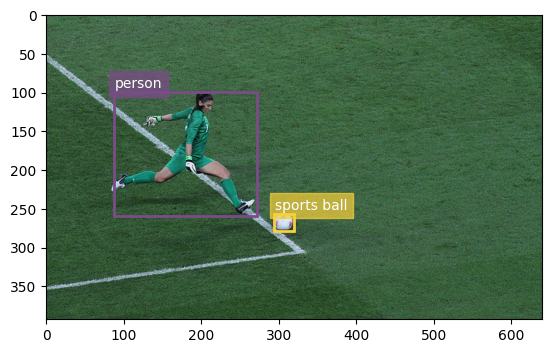

In [3]:
valInstancesJSON = preprocFuncs.getInstancesAsJSON(commonPaths.COCO_VAL_ANNOT_DIR, commonPaths.VAL_ANNOT_FILENAME)
valCategoryIdToName = preprocFuncs.associateCategoryIdWithItsName(valInstancesJSON)
valImageIdToPropsAndAnnots = preprocFuncs.associateImageIdWithItsPropsAndAnnots(valInstancesJSON)
showRandomImageWithAnnotations(commonPaths.COCO_VAL_IMG_DIR, valImageIdToPropsAndAnnots, valCategoryIdToName)